# Import Dependencies

In [1]:
!pip install tf-keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, shutil, kagglehub
import seaborn as sns

from PIL import Image

In [3]:
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# Data Loading

In [4]:
import kagglehub

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andreasrs001","key":"b3d43637f71b7b6a518499620a537368"}'}

In [6]:
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [7]:
!kaggle datasets download sagyamthapa/handwritten-math-symbols

Dataset URL: https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols
License(s): GPL-2.0


In [8]:
!unzip "handwritten-math-symbols" -d /content/math_symbols

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/math_symbols/dataset/9/77355.jpg  
  inflating: /content/math_symbols/dataset/9/77476.jpg  
  inflating: /content/math_symbols/dataset/9/77630.jpg  
  inflating: /content/math_symbols/dataset/9/78431.jpg  
  inflating: /content/math_symbols/dataset/9/78565.jpg  
  inflating: /content/math_symbols/dataset/9/78681.jpg  
  inflating: /content/math_symbols/dataset/9/78787.jpg  
  inflating: /content/math_symbols/dataset/9/78790.jpg  
  inflating: /content/math_symbols/dataset/9/79205.jpg  
  inflating: /content/math_symbols/dataset/9/79548.jpg  
  inflating: /content/math_symbols/dataset/9/79700.jpg  
  inflating: /content/math_symbols/dataset/9/79719.jpg  
  inflating: /content/math_symbols/dataset/9/79827.jpg  
  inflating: /content/math_symbols/dataset/9/79838.jpg  
  inflating: /content/math_symbols/dataset/9/7EsEQbyw.png  
  inflating: /content/math_symbols/dataset/9/7Twsh8gG.png  
  inflating: /content/m

In [9]:
main_folder = 'math_symbols/dataset'


if not os.path.exists(main_folder):
    print(f"Error: The folder '{main_folder}' does not exist.")
else:
    labels = [label for label in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, label))]
    data = []

    for label in labels:
        label_folder = os.path.join(main_folder, label)
        for file in os.listdir(label_folder):
            img_path = os.path.join(label_folder, file)
            if os.path.isfile(img_path):
                try:
                    with Image.open(img_path) as img:
                        height, width = img.size
                        data.append([file, img_path, height, width, label])
                except IOError:
                    print(f"Warning: Could not open or read image file: {img_path}")


    if data:
        df = pd.DataFrame(data, columns=['File Name', 'Directory', 'Image - Height', 'Image - Width', 'Class'])
        print(df)
    else:
        print("No image files found in the specified folders.")


          File Name                            Directory  Image - Height  \
0         38866.jpg     math_symbols/dataset/0/38866.jpg             155   
1         16606.jpg     math_symbols/dataset/0/16606.jpg             155   
2      xQIGMLX7.png  math_symbols/dataset/0/xQIGMLX7.png             400   
3      osFVDV13.png  math_symbols/dataset/0/osFVDV13.png             400   
4         85691.jpg     math_symbols/dataset/0/85691.jpg             155   
...             ...                                  ...             ...   
10066      5510.jpg    math_symbols/dataset/dec/5510.jpg             155   
10067      2403.jpg    math_symbols/dataset/dec/2403.jpg             155   
10068      3474.jpg    math_symbols/dataset/dec/3474.jpg             155   
10069      3772.jpg    math_symbols/dataset/dec/3772.jpg             155   
10070      2297.jpg    math_symbols/dataset/dec/2297.jpg             155   

       Image - Width Class  
0                137     0  
1                137     0  


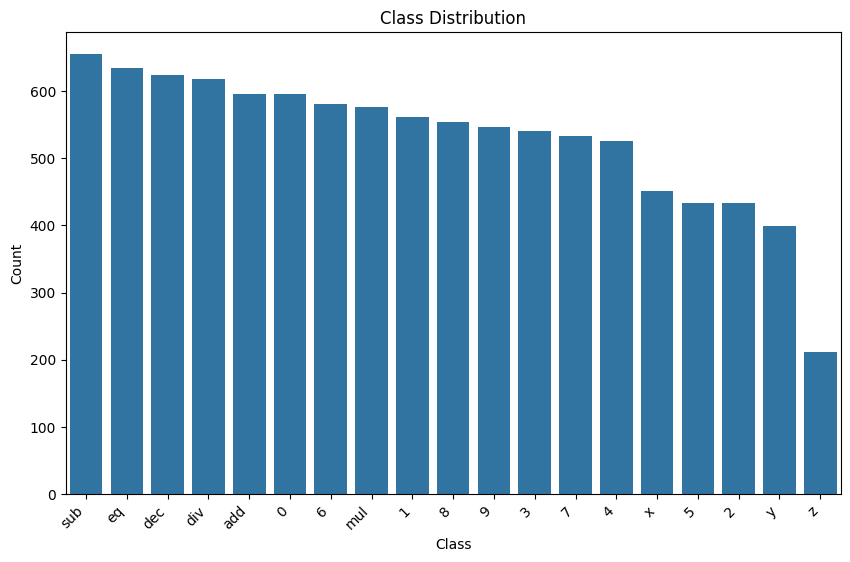

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, order=df['Class'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   File Name       10071 non-null  object
 1   Directory       10071 non-null  object
 2   Image - Height  10071 non-null  int64 
 3   Image - Width   10071 non-null  int64 
 4   Class           10071 non-null  object
dtypes: int64(2), object(3)
memory usage: 393.5+ KB


In [12]:
df['Resolution'] = df[['Image - Height', 'Image - Width']].values.tolist()
df['Resolution']

,Resolution
0,"[155, 137]"
1,"[155, 137]"
2,"[400, 400]"
3,"[400, 400]"
4,"[155, 137]"
...,...
10066,"[155, 140]"
10067,"[155, 135]"
10068,"[155, 140]"
10069,"[155, 135]"


In [13]:
resolution_proportion = df['Resolution'].value_counts(normalize=True)
resolution_proportion


,proportion
Resolution,
"[155, 135]",0.527256
"[400, 400]",0.235031
"[150, 135]",0.109522
"[155, 140]",0.067719
"[155, 137]",0.038824
"[150, 140]",0.013802
"[150, 137]",0.007745
"[100, 100]",0.000099


In [14]:
def is_high_resolution(res):
    height, width = res
    return int(height >= 300 and width >= 224)

df['High Resolution'] = df['Resolution'].apply(is_high_resolution)

df.head()

,File Name,Directory,Image - Height,Image - Width,Class,Resolution,High Resolution
0,38866.jpg,math_symbols/dataset/0/38866.jpg,155,137,0,"[155, 137]",0
1,16606.jpg,math_symbols/dataset/0/16606.jpg,155,137,0,"[155, 137]",0
2,xQIGMLX7.png,math_symbols/dataset/0/xQIGMLX7.png,400,400,0,"[400, 400]",1
3,osFVDV13.png,math_symbols/dataset/0/osFVDV13.png,400,400,0,"[400, 400]",1
4,85691.jpg,math_symbols/dataset/0/85691.jpg,155,137,0,"[155, 137]",0


In [15]:
df['High Resolution'].value_counts(normalize=True)

,proportion
High Resolution,
0,0.764969
1,0.235031


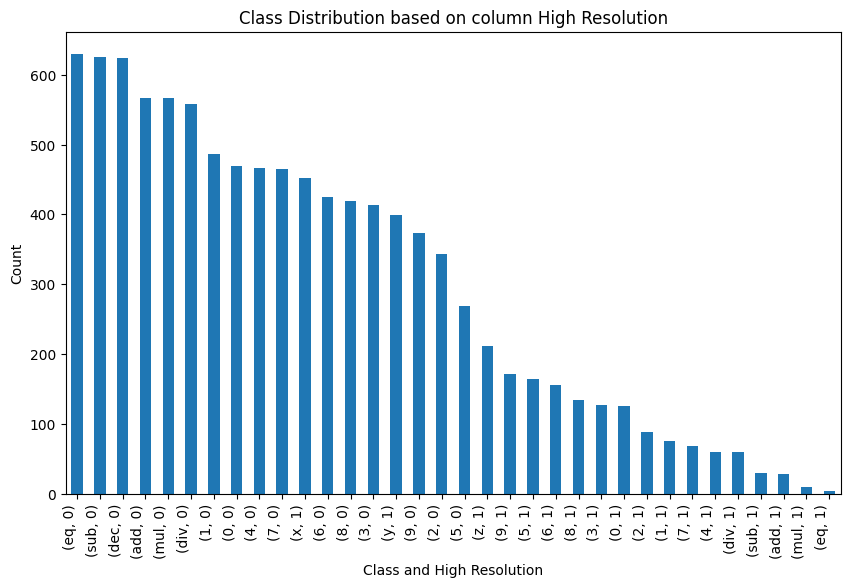

In [16]:
plt.figure(figsize=(10, 6))
df.loc[:, ['Class', 'High Resolution']].value_counts().plot(kind='bar')
plt.xticks(rotation=90, ha='right')
plt.title('Class Distribution based on column High Resolution')
plt.xlabel('Class and High Resolution')
plt.ylabel('Count')
plt.show()


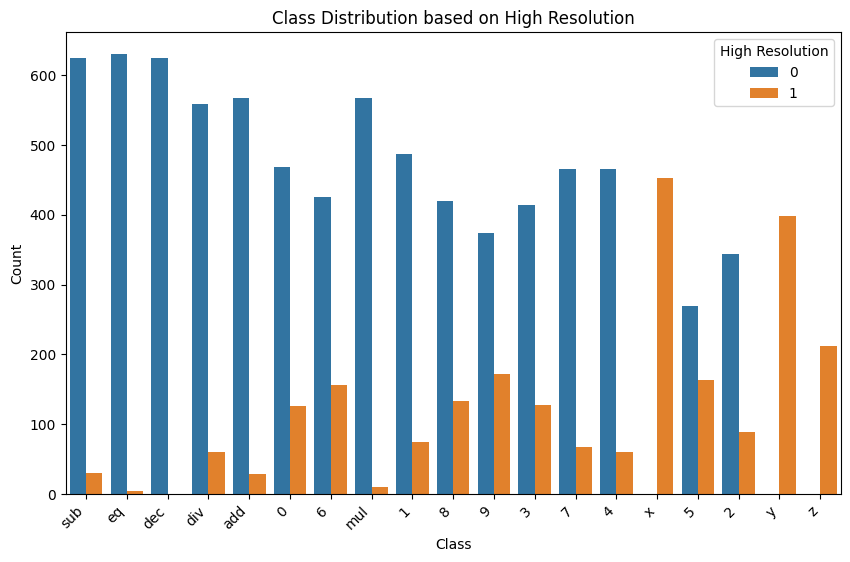

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='High Resolution', data=df, order=df['Class'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution based on High Resolution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [18]:
val_df = df.groupby(['Class', 'High Resolution'], group_keys=False).apply(lambda x: x.sample(frac=0.20))
df.drop(index=val_df.index, inplace=True)
df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)

<ipython-input-18-0dcd43a12992>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_df = df.groupby(['Class', 'High Resolution'], group_keys=False).apply(lambda x: x.sample(frac=0.20))


In [19]:
val_df

,File Name,Directory,Image - Height,Image - Width,Class,Resolution,High Resolution
0,86276.jpg,math_symbols/dataset/0/86276.jpg,155,137,0,"[155, 137]",0
1,70081.jpg,math_symbols/dataset/0/70081.jpg,155,137,0,"[155, 137]",0
2,60098.jpg,math_symbols/dataset/0/60098.jpg,155,137,0,"[155, 137]",0
3,32090.jpg,math_symbols/dataset/0/32090.jpg,155,137,0,"[155, 137]",0
4,19028.jpg,math_symbols/dataset/0/19028.jpg,155,137,0,"[155, 137]",0
...,...,...,...,...,...,...,...
2009,dJGm8Mrp.png,math_symbols/dataset/z/dJGm8Mrp.png,400,400,z,"[400, 400]",1
2010,RBdCxleT.png,math_symbols/dataset/z/RBdCxleT.png,400,400,z,"[400, 400]",1
2011,Iyy0VNuF.png,math_symbols/dataset/z/Iyy0VNuF.png,400,400,z,"[400, 400]",1
2012,OqwafpP5.png,math_symbols/dataset/z/OqwafpP5.png,400,400,z,"[400, 400]",1


In [20]:
class_resolution_counts = df.groupby(['Class', 'High Resolution']).size().unstack(fill_value=0)
class_resolution_proportions = class_resolution_counts.div(class_resolution_counts.sum(axis=1), axis=0)
class_resolution_proportions

High Resolution,0,1
Class,,
0,0.787815,0.212185
1,0.866667,0.133333
2,0.794798,0.205202
3,0.764434,0.235566
4,0.885986,0.114014
5,0.621387,0.378613
6,0.731183,0.268817
7,0.873239,0.126761
8,0.758465,0.241535


In [21]:
class_resolution_val_counts = val_df.groupby(['Class', 'High Resolution']).size().unstack(fill_value=0)
class_resolution_proportions = class_resolution_val_counts.div(class_resolution_val_counts.sum(axis=1), axis=0)
class_resolution_proportions

High Resolution,0,1
Class,,
0,0.789916,0.210084
1,0.866071,0.133929
2,0.793103,0.206897
3,0.768519,0.231481
4,0.885714,0.114286
5,0.620690,0.379310
6,0.732759,0.267241
7,0.869159,0.130841
8,0.756757,0.243243


In [22]:
labels = os.listdir(main_folder)

partitions = {'Training': df, 'Validation': val_df}

for partition_name, partition_df in partitions.items():
    os.makedirs(partition_name, exist_ok=True)
    for label in labels:
        target_directory = os.path.join(partition_name, label)
        os.makedirs(target_directory, exist_ok=True)
        for image_path in partition_df.loc[partition_df['Class'] == label, 'Directory']:
            try:
                shutil.move(image_path, target_directory)
            except FileNotFoundError:
                print(f"Warning: File not found: {image_path}")
            except shutil.Error as e:
                print(f"Warning: Error moving file {image_path}: {e}")


In [23]:
img_height = 300
img_width = 224
batch_size = 8

In [46]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    './Training',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    './Validation',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
)

num_classes = len(train_ds.class_names)
class_names = train_ds.class_names

Found 8057 files belonging to 19 classes.
Found 2014 files belonging to 19 classes.


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [26]:
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='reflect'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
], name="data_augmentation")

In [27]:
def transfer_learning(model_name="efficientnetv2-b0", fine_tune=True):
    base_model = tf.keras.applications.EfficientNetV2B0(
        include_top=False,
        input_shape=(img_height, img_width, 3),
        include_preprocessing=True,
        weights='imagenet'
    )
    base_model.trainable = fine_tune

    model = tf.keras.Sequential([
        tf.keras.Input(shape=(img_height, img_width, 3)),

        image_augmentation,

        base_model,

        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ])

    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
    )

    return model

In [28]:
efficientNetV2_model = transfer_learning("efficientnetv2-b0", fine_tune=True)
efficientNetV2_model.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 300, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, 10, 7, 1280)       5919312   
 nal)                                                            
                                                                 
 conv2d (Conv2D)             (None, 10, 7, 64)         737344    
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 3, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 3, 32)          18

In [29]:
def plot_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)
    best_epoch = np.argmax(history.history['val_accuracy']) + 1
    best_val_acc = np.max(history.history['val_accuracy'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(epochs, history.history['loss'], color='blue', label='Training Loss')
    ax1.plot(epochs, history.history['val_loss'], color='red', label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(epochs, history.history['accuracy'], color='blue', label='Training Accuracy')
    ax2.plot(epochs, history.history['val_accuracy'], color='red', label='Validation Accuracy')
    ax2.axhline(0.95, linestyle='dashdot', color='orange', label='Target 95%')
    ax2.axhline(0.95, linestyle='dashdot', color='green', label='Target 95%')
    ax2.axvline(best_epoch, linestyle='dotted', color='purple', label=f'Best Epoch ({best_epoch})')
    ax2.set_title(f'Training and Validation Accuracy (Best: {best_val_acc:.2%})')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

In [30]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6)
]

In [31]:
accuracy_callback = callbacks

# Model Training

In [32]:
history = efficientNetV2_model.fit(
    train_ds,
    epochs=25,
    callbacks=[accuracy_callback],
    validation_data=val_ds
)

Epoch 1/25
1008/1008 [==============================] - 152s 93ms/step - loss: 2.2701 - accuracy: 0.2868 - val_loss: 0.9497 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 2/25
1008/1008 [==============================] - 87s 86ms/step - loss: 1.2842 - accuracy: 0.5856 - val_loss: 0.5015 - val_accuracy: 0.8317 - lr: 1.0000e-04
Epoch 3/25
1008/1008 [==============================] - 86s 86ms/step - loss: 0.9041 - accuracy: 0.7071 - val_loss: 0.3735 - val_accuracy: 0.8714 - lr: 1.0000e-04
Epoch 4/25
1008/1008 [==============================] - 87s 86ms/step - loss: 0.7376 - accuracy: 0.7636 - val_loss: 0.3602 - val_accuracy: 0.8908 - lr: 1.0000e-04
Epoch 5/25
1008/1008 [==============================] - 86s 86ms/step - loss: 0.6223 - accuracy: 0.8063 - val_loss: 0.1933 - val_accuracy: 0.9320 - lr: 1.0000e-04
Epoch 6/25
1008/1008 [==============================] - 85s 85ms/step - loss: 0.5346 - accuracy: 0.8342 - val_loss: 0.2433 - val_accuracy: 0.9225 - lr: 1.0000e-04
Epoch 7/25
1008/1008 

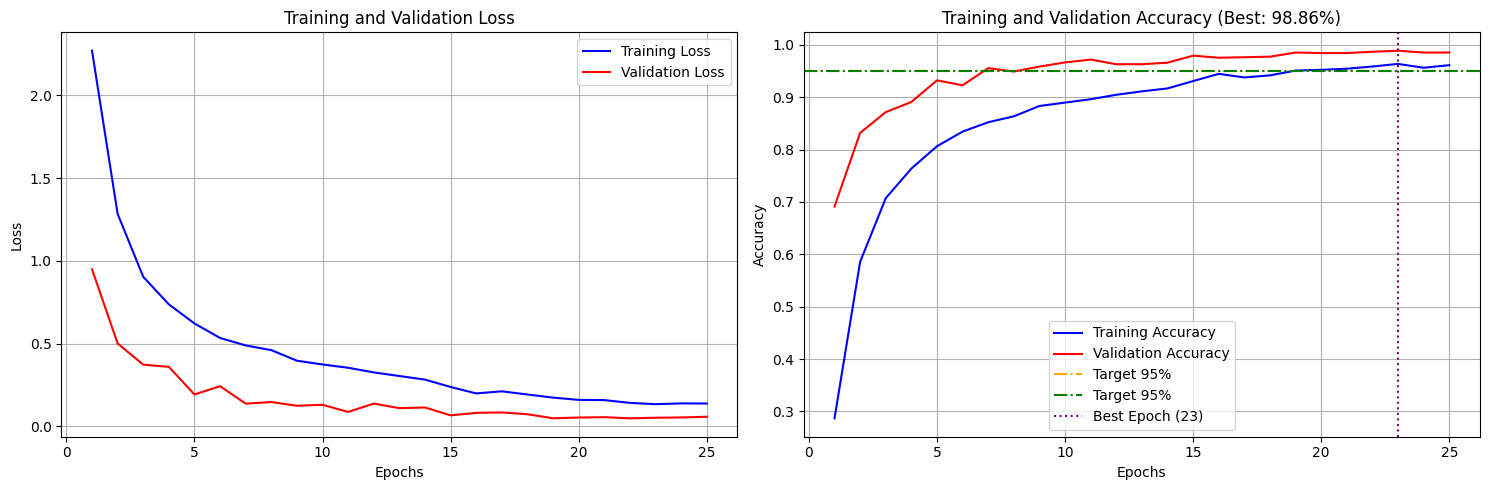

In [33]:
plot_training_history(history)

In [34]:
efficientNetV2_model.evaluate(val_ds)

252/252 [==============================] - 5s 20ms/step - loss: 0.0491 - accuracy: 0.9866


[0.049121782183647156, 0.9865938425064087]

# Save Model

.savedmodel

In [35]:
os.mkdir('saved_model')
efficientNetV2_model.save('saved_model/math_symbol_classifier')

.keras/.h5

In [36]:
os.mkdir('model_keras')
efficientNetV2_model.save('model_keras/math_symbol_classifier.keras')
efficientNetV2_model.save('model_keras/math_symbol_classifier.h5')

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TF-lite

In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/math_symbol_classifier')
tflite_model = converter.convert()

os.makedirs('model_tflite', exist_ok=True)

with open('model_tflite/math_symbol_classifier.tflite', 'wb') as f:
  f.write(tflite_model)


TFJS

In [38]:
os.mkdir('tfjs')

In [39]:
!pip install tensorflowjs --break-system-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [40]:
!tensorflowjs_converter \
  --input_format=keras \
  --quantize_uint8=1 \
  ./model_keras/math_symbol_classifier.h5 \
  ./tfjs/

2025-04-16 08:51:29.735150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744793489.966356   12711 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744793490.031769   12711 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!


In [47]:
labels = list(class_names)
with open("model_tflite/label.txt", "w") as f:
    for i, label in enumerate(labels):
        f.write(f"{i} {label}\n")


In [48]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.7.0.35.30
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confec